In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter
from bisect import bisect_left, bisect_right

F1 = open("E:\\Fundholding1.pkl", 'rb')
F2 = open("C:\\Users\\win\\Downloads\\marketHolderShare.pkl", 'rb')
F3 = open("E:\\公募基金持仓数据1.pkl", 'rb')
F5 = open("E:\\公募基金持仓数据2.pkl", 'rb')
F4 = open("C:\\Users\\win\\Downloads\\inst_holding_20190930.pkl", 'rb')
ty_pe = pd.read_csv('D:\\work\\project 6 基金持仓预测\\fund_type.csv', encoding="GBK")
ty_pe["证券代码"] = ty_pe["证券代码"].apply(lambda x: x.split('.')[1] + x.split('.')[0])
industry = pd.read_csv('D:\\work\\project 6 基金持仓预测\\行业.csv', encoding="GBK")
industry["证券代码1"] = industry["证券代码"].apply(lambda x: x.split('.')[0])
industry["证券代码2"] = industry["证券代码"].apply(lambda x: x.split('.')[1] + x.split('.')[0])
CSI800 = pd.read_csv("D:\\work\\project 6 基金持仓预测\\index_comp_SH000906.csv", encoding="utf-8")
df1 = pickle.load(F1)
df2 = pickle.load(F2)
df3 = pickle.load(F3)
df5 = pickle.load(F5)
df4 = pickle.load(F4)
df3 = pd.concat([df3, df5])
df3["end_date"] = df3["end_date"].astype(int)
df3["ts_code"] = df3["ts_code"].apply(lambda x: x.split('.')[1] + x.split('.')[0])
mv = pd.read_csv('E:\\all_stock_2010_2019.csv', encoding="GBK").iloc[:, 1:]
sw = pd.read_csv('D:\\work\\project 6 基金持仓预测\\申万一级行业指数.csv', encoding="GBK")
hy = pd.read_csv('D:\\work\\project 6 基金持仓预测\\半年收益率.csv', encoding="GBK")
hy.head()
for i in hy.columns[1:]:
    hy[i] = hy[i].apply(lambda x: float(str(x).replace(",", "")))
    hy[i] = hy[i]/hy[i].shift(1) - 1

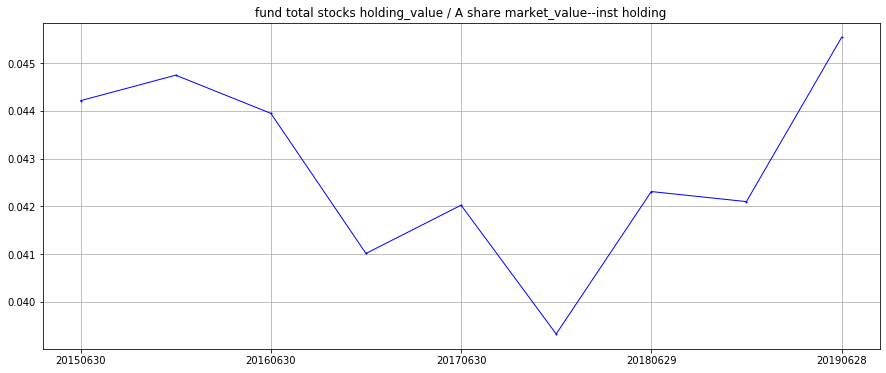

,ReportDate,Fund_MV,Date,MarketValue,prob
0,20150630,2.062295e+12,2015-06-30,4.664363e+13,0.044214
1,20151231,1.850902e+12,2015-12-31,4.136299e+13,0.044748
2,20160630,1.583281e+12,2016-06-30,3.602597e+13,0.043948
3,20161231,1.598747e+12,2016-12-30,3.898013e+13,0.041014
4,20170630,1.737319e+12,2017-06-30,4.133964e+13,0.042026
5,20171231,1.754938e+12,2017-12-29,4.462210e+13,0.039329
6,20180630,1.691792e+12,2018-06-29,3.998454e+13,0.042311
7,20181231,1.482230e+12,2018-12-28,3.520694e+13,0.042101
8,20190630,2.008875e+12,2019-06-28,4.411484e+13,0.045537


In [6]:
df4 = df4[(df4["ReportDate"] >= 20150331) & (df4["ReportDate"] <= 20190630)]
date = df4["ReportDate"].unique()[1:][::2]
m1 = df4[df4["ReportDate"].isin(date)].groupby("ReportDate")["Fund_MV"].sum().reset_index()
date2 = []
date1 = np.sort(mv["Date"].unique())
for i in date:
    date2.append(date1[bisect_right(date1, i)-1])
m2 = mv[mv["Date"].isin(date2)].groupby("Date")["MarketValue"].sum()*10000
m2 = m2.reset_index()
m3 = pd.concat([m1, m2], axis=1)
m3["prob"] = m3["Fund_MV"]/m3["MarketValue"]
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y%m'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return pd.to_datetime(self.dates[ind], format="%Y%m%d").strftime(self.fmt)

fig, ax = plt.subplots(figsize=(15, 6))
m3["Date"] = m3["Date"].apply(lambda x: str(x))
m3["Date"] = pd.to_datetime(m3["Date"])
ax.plot(np.arange(len(m3)), m3["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m3), 2))
ax.xaxis.set_major_formatter(MyFormatter(m3["Date"].values, '%Y%m%d'))
ax.set_title("fund total stocks holding_value / A share market_value--inst holding")
ax.grid()
plt.show()
m3

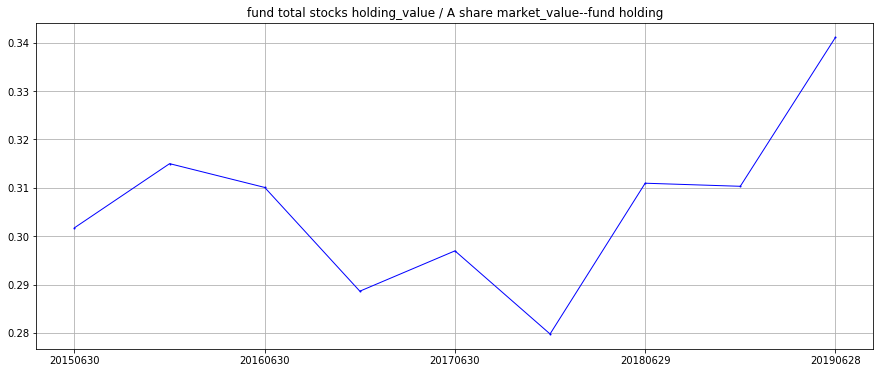

,TargetDate,HoldingValue,Date,TotalValue,prob
0,20150630,1.954844e+12,2015-06-30,6.478617e+12,0.301738
1,20151231,1.833046e+12,2015-12-31,5.819256e+12,0.314997
2,20160630,1.568921e+12,2016-06-30,5.059792e+12,0.310076
3,20161231,1.602717e+12,2016-12-30,5.552885e+12,0.288628
4,20170630,1.748622e+12,2017-06-30,5.888315e+12,0.296965
5,20171231,1.764285e+12,2017-12-29,6.305978e+12,0.279780
6,20180630,1.737937e+12,2018-06-29,5.589100e+12,0.310951
7,20181231,1.511063e+12,2018-12-28,4.869463e+12,0.310314
8,20190630,2.043397e+12,2019-06-28,5.990861e+12,0.341086


In [7]:
date2 = []
date1 = np.sort(mv["Date"].unique())
for i in date:
    date2.append(date1[bisect_right(date1, i)-1])
date2
n1 =df1[df1["TargetDate"].isin(date)].groupby("TargetDate")["HoldingValue"].sum().reset_index()
n2 = mv[mv["Date"].isin(date2)].groupby("Date")["TotalValue"].sum()*1000
n2 = n2.reset_index()
n3 = pd.concat([n1, n2], axis=1)
n3["prob"] = n3["HoldingValue"]/n3["TotalValue"]
fig, ax = plt.subplots(figsize=(15, 6))
n3["Date"] = n3["Date"].apply(lambda x: str(x))
n3["Date"] = pd.to_datetime(n3["Date"])
ax.plot(np.arange(len(m3)), n3["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m3), 2))
ax.xaxis.set_major_formatter(MyFormatter(n3["Date"].values, '%Y%m%d'))
ax.set_title("fund total stocks holding_value / A share market_value--fund holding")
ax.grid()
plt.show()
n3

In [8]:
#基金前十大重仓股（一季报、三季报），全部持仓股票（中报、年报）
df1[(df1["FundID"] == "SH500028") & (df1["TargetDate"]==20010930)]
df1[(df1["TargetDate"] == 19980930) & (df1["FundID"] == "SH500001")].sort_values(by="rank")
# df1[(df1["FundID"] == "SZ184801") & (df1["TargetDate"] == 20190630)]
df1[df1["FundName"].str.contains("B")]["FundID"].unique()


array(['OF001001', 'OF050006', 'OF050011', 'OF050016', 'OF090002',
       'OF100035', 'OF121012', 'OF202105', 'OF213007', 'OF519666',
       'OF519680'], dtype=object)

In [9]:
# 1. 公募集金持股总市值变化/占A股市值的比例
df1 = df1[df1["TargetDate"] >= min(mv["Date"])]
date = df1["TargetDate"].unique()[1:][::2]
dff = df3[df3["end_date"].isin(date)]
dff = dff.sort_values(by=["ts_code", "end_date", "stk_mkv_ratio"])
dff = dff.groupby(["end_date", "ts_code"])["mkv", "stk_mkv_ratio"].last().reset_index()
dff["HoldingValue"] = dff["mkv"]/dff["stk_mkv_ratio"] * 100
mv1 = dff.groupby("end_date")["HoldingValue"].sum().reset_index()

from bisect import bisect_left, bisect_right
date1 = np.sort(mv["Date"].unique())
date2 = []
for i in date:
    date2.append(date1[bisect_right(date1, i)-1])
mv2 = mv[mv["Date"].isin(date2)].groupby("Date")["MarketValue"].sum()*10000
mv2 = mv2.reset_index()

m_v = pd.concat([mv1, mv2], axis=1)
m_v["prob"] = m_v["HoldingValue"]/m_v["MarketValue"]
m_v["Date"] = m_v["Date"].apply(lambda x: str(x))
m_v["Date"] = pd.to_datetime(m_v["Date"])
m_v

,end_date,HoldingValue,Date,MarketValue,prob
0,20100630,1.349868e+12,2010-06-30,1.233506e+13,0.109433
1,20101231,1.783087e+12,2010-12-31,1.878125e+13,0.094940
2,20110630,1.598991e+12,2011-06-30,1.956261e+13,0.081737
3,20111231,1.325577e+12,2011-12-30,1.607777e+13,0.082448
4,20120630,1.353585e+12,2012-06-29,1.695655e+13,0.079827
5,20121231,1.364021e+12,2012-12-31,1.779762e+13,0.076641
6,20130630,1.315694e+12,2013-06-28,1.650371e+13,0.079721
7,20131231,1.408061e+12,2013-12-31,1.960001e+13,0.071840
8,20140630,1.255142e+12,2014-06-30,1.996929e+13,0.062854
9,20141231,1.762994e+12,2014-12-31,3.110385e+13,0.056681


In [10]:
d1 = df1[df1["TargetDate"] == 20190630].groupby("FundID")["ratio", "HoldingValue"].sum().reset_index()
d2 = df1[df1["TargetDate"] == 20190630].groupby("FundID")["rank"].max().reset_index()
dd1 = pd.merge(d1, d2, on="FundID")
dd1["TargetDate"] = 20190630
d3 = df1[df1["TargetDate"] == 20191231].groupby("FundID")["ratio", "HoldingValue"].sum().reset_index()
d4 = df1[df1["TargetDate"] == 20191231].groupby("FundID")["rank"].max().reset_index()
dd2 = pd.merge(d3, d4, on="FundID")
dd2["TargetDate"] = 20191231
pd.merge(dd1, dd2, on="FundID")

,FundID,ratio_x,HoldingValue_x,rank_x,TargetDate_x,ratio_y,HoldingValue_y,rank_y,TargetDate_y
0,OF000001,67.65,3.189469e+09,110,20190630,39.19,1.802318e+09,10,20191231
1,OF000003,19.84,2.375952e+07,6,20190630,20.11,2.763329e+07,5,20191231
2,OF000005,0.39,5.234480e+05,2,20190630,0.78,9.542074e+05,2,20191231
3,OF000006,84.13,1.152733e+08,283,20190630,8.19,1.142579e+07,10,20191231
4,OF000008,1.79,4.109854e+07,504,20190630,0.01,6.913367e+05,10,20191231
...,...,...,...,...,...,...,...,...,...
3349,OF750001,79.66,6.919256e+07,44,20190630,53.01,8.959537e+07,10,20191231
3350,OF750005,28.77,1.780130e+07,25,20190630,16.27,1.679282e+06,10,20191231
3351,OF762001,83.54,2.197948e+08,31,20190630,61.01,4.518614e+08,10,20191231
3352,OF770001,88.09,2.885950e+07,29,20190630,51.00,7.231374e+07,10,20191231


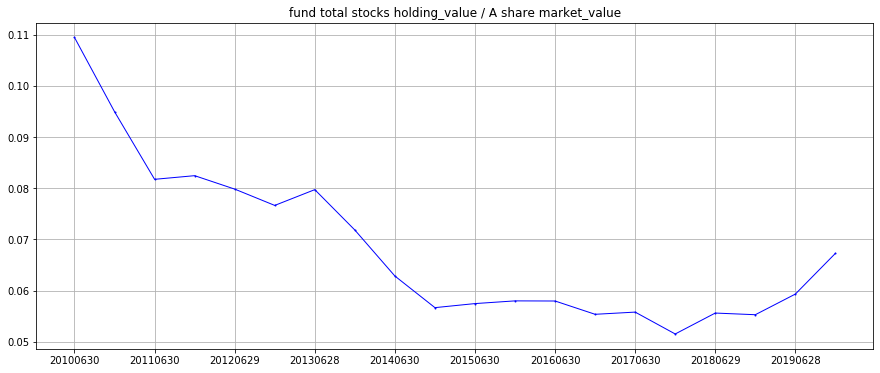

In [11]:
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y%m'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return pd.to_datetime(self.dates[ind], format="%Y%m%d").strftime(self.fmt)

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(np.arange(len(m_v)), m_v["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m_v), 2))
ax.xaxis.set_major_formatter(MyFormatter(m_v["Date"].values, '%Y%m%d'))
ax.set_title("fund total stocks holding_value / A share market_value")
ax.grid()
plt.show()

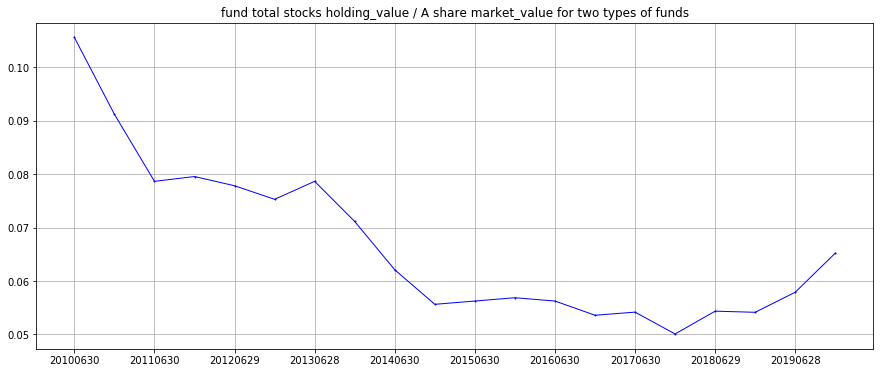

In [12]:
df3 = pd.merge(df3, ty_pe, left_on = "ts_code", right_on = "证券代码")
df11 = df3[(df3["证监会基金类型"]=="股票型基金")|(df3["证监会基金类型"]=="混合型基金")]
dff1 = df11[df11["end_date"].isin(date)]
dff1 = dff1.sort_values(by=["ts_code", "end_date", "stk_mkv_ratio"])
dff1 = dff1.groupby(["end_date", "ts_code"])["mkv", "stk_mkv_ratio"].last().reset_index()
dff1["HoldingValue"] = dff1["mkv"]/dff1["stk_mkv_ratio"] * 100
mv1 = dff1.groupby("end_date")["HoldingValue"].sum().reset_index()

from bisect import bisect_left, bisect_right
date1 = np.sort(mv["Date"].unique())
date2 = []
for i in date:
    date2.append(date1[bisect_right(date1, i)-1])
mv2 = mv[mv["Date"].isin(date2)].groupby("Date")["MarketValue"].sum()*10000
mv2 = mv2.reset_index()

m_v = pd.concat([mv1, mv2], axis=1)
m_v["prob"] = m_v["HoldingValue"]/m_v["MarketValue"]
m_v["Date"] = m_v["Date"].apply(lambda x: str(x))
m_v["Date"] = pd.to_datetime(m_v["Date"])
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(np.arange(len(m_v)), m_v["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m_v), 2))
ax.xaxis.set_major_formatter(MyFormatter(m_v["Date"].values, '%Y%m%d'))
ax.set_title("fund total stocks holding_value / A share market_value for two types of funds")
ax.grid()
plt.show()

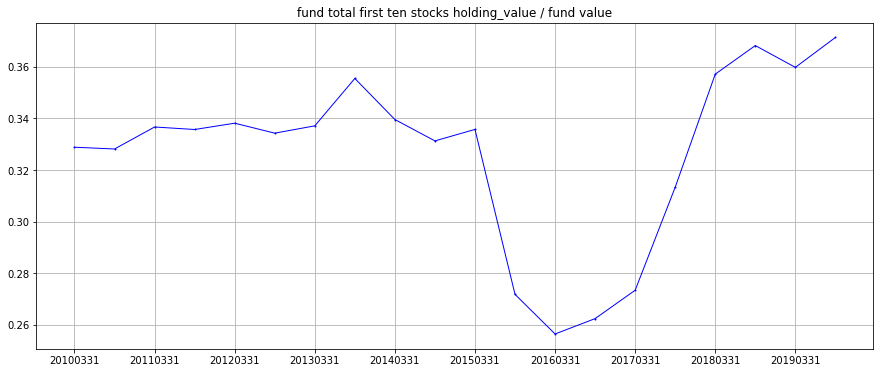

In [13]:
# 2. 公募集金前十大持仓股总市值占基金规模的比例
date = df1["TargetDate"].unique()[::2]
dff = df1[df1["TargetDate"].isin(date)]
dff = dff[pd.merge(dff, dff[(dff["rank"] == 1) & (dff["ratio"]==0)], left_on=["FundID", "TargetDate"], right_on=["FundID", "TargetDate"], 
                   how="left")["FundName_y"].isnull().values]
dff["total"] = 0
dff.loc[dff["rank"]==1, "total"] = (dff.loc[dff["rank"]==1]["HoldingValue"]/dff.loc[dff["rank"]==1]["ratio"])*100
m_v1 = dff.groupby("TargetDate")["HoldingValue", "total"].sum().reset_index()
m_v1["prob"] = m_v1["HoldingValue"]/m_v1["total"]
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(np.arange(len(m_v1)), m_v1["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m_v1), 2))
ax.xaxis.set_major_formatter(MyFormatter(m_v1["TargetDate"].values, '%Y%m%d'))
ax.set_title("fund total first ten stocks holding_value / fund value")
ax.grid()
plt.show()

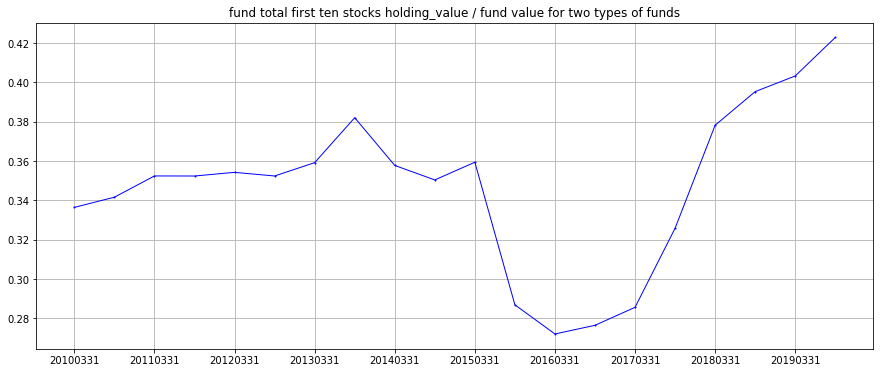

array([20100331, 20100930, 20110331, 20110930, 20120331, 20120930,
       20130331, 20130930, 20140331, 20140930, 20150331, 20150930,
       20160331, 20160930, 20170331, 20170930, 20180331, 20180930,
       20190331, 20190930], dtype=int64)

In [20]:
df1 = pd.merge(df1, ty_pe, left_on = "FundID", right_on = "证券代码")
date = df1["TargetDate"].unique()[::2]
df11 = df1[(df1["证监会基金类型"]=="股票型基金")|(df1["证监会基金类型"]=="混合型基金")]
dff = df11[df11["TargetDate"].isin(date)]
dff = dff[pd.merge(dff, dff[(dff["rank"] == 1) & (dff["ratio"]==0)], left_on=["FundID", "TargetDate"], right_on=["FundID", "TargetDate"], 
                   how="left")["FundName_y"].isnull().values]
dff["total"] = 0
dff.loc[dff["rank"]==1, "total"] = (dff.loc[dff["rank"]==1]["HoldingValue"]/dff.loc[dff["rank"]==1]["ratio"])*100
m_v1 = dff.groupby("TargetDate")["HoldingValue", "total"].sum().reset_index()
m_v1["prob"] = m_v1["HoldingValue"]/m_v1["total"]
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(np.arange(len(m_v1)), m_v1["prob"], color='blue', alpha=2, linewidth=1, marker='.', markersize=2)
plt.xticks(np.arange(0, len(m_v1), 2))
ax.xaxis.set_major_formatter(MyFormatter(m_v1["TargetDate"].values, '%Y%m%d'))
ax.set_title("fund total first ten stocks holding_value / fund value for two types of funds")
ax.grid()
plt.show()
date

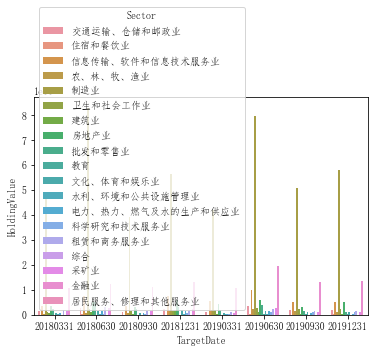

In [21]:
# 3. 公募基金持股在各行业的分布
fb = df1.groupby(["TargetDate", "Sector"])["HoldingValue"].sum().reset_index()
fb = fb[fb["TargetDate"] >= 20180000]
fb = fb[(fb["Sector"]!='0') & (fb["Sector"]!="")]
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False
sns.barplot(x="TargetDate", hue="Sector", y="HoldingValue", data=fb)


In [3]:
df1 = pd.merge(df1, industry, left_on="StockID", right_on="证券代码1")
df1 = df1[(df1["TargetDate"] >= min(mv["Date"])) & (df1["TargetDate"] < 20191231)]
date = np.sort(df1["TargetDate"].unique())[1:][::2]
fb = df1[df1["TargetDate"].isin(date)]
fb1 = fb.groupby(["TargetDate", "所属申万行业指数"])["HoldingValue"].sum().reset_index()
fb2 = fb1.groupby("TargetDate")["HoldingValue"].sum().reset_index()
fb1 = pd.merge(fb1, fb2, on="TargetDate")
fb1["perc"] = fb1["HoldingValue_x"] / fb1["HoldingValue_y"]
date1 = CSI800["Date"].values
date2 = []
for i in date:
    date2.append(date1[bisect_right(date1, i)-1])
CSI800 = CSI800[CSI800["Date"].isin(date2)]
dff = pd.DataFrame(CSI800.iloc[:, 1:].values.T, index=CSI800.columns[1:], columns=CSI800.iloc[:, 0].values).reset_index()
dff = pd.merge(dff, industry, left_on="index", right_on="证券代码2")
ind = pd.DataFrame()
for i in date2:
    ind1 = dff.loc[:, [i, "所属申万行业指数"]][dff[i]!=0].groupby("所属申万行业指数")[i].sum().reset_index()
    ind1["TargetDate"] = date[date2.index(i)]
    ind1 = ind1.rename(columns={i: "perc1"})
    ind = pd.concat([ind, ind1]) 
re = pd.merge(fb1, ind, on=["TargetDate", "所属申万行业指数"], how="inner")
re["alloc"] = re["perc"]*100 - re["perc1"]
sw = pd.DataFrame(sw.iloc[:, 2:].values.T, index=sw.columns[2:], columns=sw["证券名称"]).reset_index()
sw["index"] = sw["index"].astype(int)
re[re["所属申万行业指数"] == "食品饮料"]

,TargetDate,所属申万行业指数,HoldingValue_x,HoldingValue_y,perc,perc1,alloc
27,20100630,食品饮料,1.068065e+11,1.334970e+12,0.080007,3.920000,4.080672
55,20101231,食品饮料,1.373867e+11,1.722272e+12,0.079771,4.330000,3.647058
83,20110630,食品饮料,1.288909e+11,1.538941e+12,0.083753,4.670000,3.705294
111,20111231,食品饮料,1.432831e+11,1.267357e+12,0.113057,6.330000,4.975660
139,20120630,食品饮料,1.487017e+11,1.305116e+12,0.113938,6.610000,4.783751
167,20121231,食品饮料,1.181130e+11,1.333272e+12,0.088589,5.510000,3.348883
195,20130630,食品饮料,1.046245e+11,1.209040e+12,0.086535,5.440000,3.213518
223,20131231,食品饮料,1.028080e+11,1.298509e+12,0.079174,4.690000,3.227384
251,20140630,食品饮料,7.572986e+10,1.159866e+12,0.065292,4.530000,1.999189
279,20141231,食品饮料,5.546059e+10,1.466604e+12,0.037816,3.720000,0.061565


In [6]:
import statsmodels.api as sm

hy = hy.rename(columns={"证券名称": "TargetDate"})
hy1 = pd.DataFrame()
for i in hy.columns[1:]:
    hyy = hy.loc[:, ["TargetDate", i]]
    hyy["所属申万行业指数"] = i
    hyy = hyy.rename(columns={i: "half_year_ret"})
    hy1 = pd.concat([hy1, hyy])
hy1 = hy1.sort_values(by=["所属申万行业指数", "TargetDate"])
re = re.sort_values(by=["所属申万行业指数", "TargetDate"])
hy1["lag1"] = hy1.groupby(["所属申万行业指数"])["half_year_ret"].shift(1)
hy1["lag2"] = hy1.groupby(["所属申万行业指数"])["half_year_ret"].shift(2)
hy1["lag3"] = hy1.groupby(["所属申万行业指数"])["half_year_ret"].shift(3)
re["alloc_diff"] = re.groupby("所属申万行业指数")["alloc"].apply(lambda x: x - x.shift(1))
cal = pd.merge(re.loc[:, ["TargetDate", "所属申万行业指数", "alloc_diff"]], hy1, on=["TargetDate", "所属申万行业指数"])
cal = cal.dropna()
y = cal["half_year_ret"]
X = cal["alloc_diff"]
X = sm.add_constant(X)
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())

y = cal["alloc_diff"]
X = cal["lag3"]
X = sm.add_constant(X)
est = sm.OLS(y, X)
est = est.fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:          half_year_ret   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     41.90
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           2.29e-10
Time:                        21:19:50   Log-Likelihood:                -19.893
No. Observations:                 504   AIC:                             43.79
Df Residuals:                     502   BIC:                             52.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0505      0.011      4.492      0.0

In [26]:
def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
    extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]


In [27]:
re["所属申万行业指数"].unique()

array(['交通运输', '休闲服务', '传媒', '公用事业', '农林牧渔', '化工', '医药生物', '商业贸易', '国防军工',
       '家用电器', '建筑材料', '建筑装饰', '房地产', '有色金属', '机械设备', '汽车', '电子', '电气设备',
       '纺织服装', '综合', '计算机', '轻工制造', '通信', '采掘', '钢铁', '银行', '非银金融',
       '食品饮料'], dtype=object)

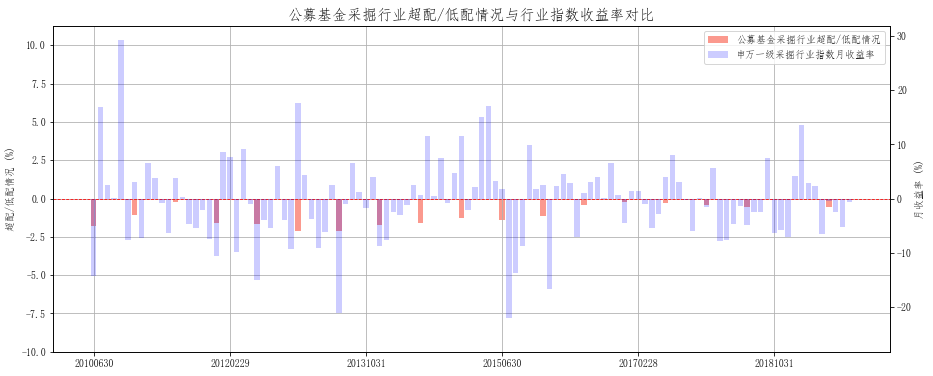

In [28]:
pp = pd.merge(re[re["所属申万行业指数"] == "采掘"].loc[:, ["TargetDate", "alloc"]], sw.loc[:, ["index", "采掘"]], left_on="TargetDate", right_on="index", how="right").sort_values(by="index")
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False
class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y%m'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return pd.to_datetime(self.dates[ind], format="%Y%m%d").strftime(self.fmt)
fig, ax = plt.subplots(figsize=(15, 6))
ax1 = ax.twinx()
ax.bar(np.arange(len(pp)), pp["alloc"], color='salmon', alpha=0.8, label='公募基金采掘行业超配/低配情况')
ax.set_ylim(-10, 10)
# ax.plot(np.arange(len(pp)), pp["食品饮料"], color='blue', alpha=2, linewidth=1, linestyle='-', marker='.',
#         markersize=2, label='申万一级食品饮料行业指数月收益率')
ax1.bar(np.arange(len(pp)), pp["采掘"], color='blue', alpha=0.2, label='申万一级采掘行业指数月收益率')
ax1.set_ylabel('月收益率 (%)',fontsize=10)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.8)
ax.set_xlabel('')
sw["index1"] = sw["index"].apply(lambda x: str(x))
sw["index1"] = pd.to_datetime(sw["index1"])
ax.xaxis.set_major_formatter(MyFormatter(sw["index1"].values, '%Y%m%d'))
ax.set_title("公募基金采掘行业超配/低配情况与行业指数收益率对比", fontsize=15)
ax.set_ylabel("超配/低配情况 (%)", fontsize=10)
align_yaxis_np(ax, ax1)
ax.grid()
plt.show()

In [29]:
re[re["所属申万行业指数"] == "医药生物"]

,TargetDate,所属申万行业指数,HoldingValue_x,HoldingValue_y,perc,perc1,alloc
6,20100630,医药生物,1.570315e+11,1.334970e+12,0.117629,5.920000,5.842929
34,20101231,医药生物,1.865457e+11,1.722272e+12,0.108314,6.090000,4.741372
62,20110630,医药生物,1.312432e+11,1.538941e+12,0.085282,5.900000,2.628151
90,20111231,医药生物,1.264193e+11,1.267357e+12,0.099750,5.960000,4.015036
118,20120630,医药生物,1.321954e+11,1.305116e+12,0.101290,6.370000,3.759013
146,20121231,医药生物,1.484286e+11,1.333272e+12,0.111327,6.230000,4.902651
174,20130630,医药生物,1.789864e+11,1.209040e+12,0.148040,8.040000,6.764012
202,20131231,医药生物,2.008979e+11,1.298509e+12,0.154714,8.200000,7.271422
230,20140630,医药生物,1.963448e+11,1.159866e+12,0.169282,8.260000,8.668231
258,20141231,医药生物,1.446189e+11,1.466604e+12,0.098608,6.400000,3.460800


<Figure size 432x288 with 0 Axes>

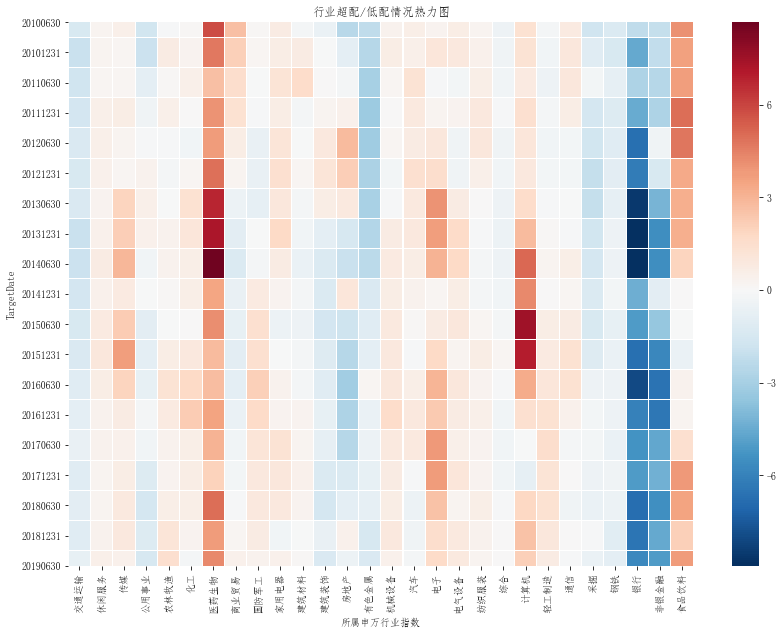

In [30]:
pdd = pd.pivot_table(re.loc[:, ["TargetDate", "所属申万行业指数", "alloc"]], index=["TargetDate"], columns=["所属申万行业指数"])
pdd.columns = pdd.columns.levels[1]
import seaborn as sns
fig = plt.figure()
f, ax= plt.subplots(figsize = (14, 10))
sns_plot = sns.heatmap(pdd, annot=False, cmap="RdBu_r",center=0, linewidths=0.05, ax=ax)
plt.tick_params(labelsize=10)
ax.set_title("行业超配/低配情况热力图")
plt.show()